#### Project:
Boombikes which is bike-sharing service provider needs to analyze and identify factors that influence the demand for the bike sharing users.
It needs this information to prepare itself for better positioning of the services to maximize revenue once the COVID-19 situation is under control and the market and economy improves.
#### Assumption:
1. Assuming the holiday information in the datset is correct
#### Approach
We will use RFE & VIF to identify the suitable Linear Model

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
pd.set_option('display.max_columns', 100)

# Step 1: Data Preprocessing

#### Step 1.1: Import Dataset for visual inspection

In [3]:
df_orig = pd.read_csv('day.csv')
df_orig.head(30)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.181250,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.686950,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.470250,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.606100,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.463500,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.660450,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.441950,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.112700,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.808750,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.544400,48.2917,14.958889,41,1280,1321


In [4]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Step 1.2: Convert dteday to date 

In [5]:
def func_parse_date(in_date_str, in_date_format):
    return datetime.strptime(in_date_str, in_date_format)

In [6]:
df_orig['dteday'] = df_orig['dteday'].apply(lambda x: func_parse_date(x,'%d-%m-%Y'))

### Step 1.3 Validate features dependent on date

In [7]:
# Validate year
(df_orig['dteday'].apply(lambda x:1 if x.year==2019 else 0) != df_orig['yr']).sum()

# Count is zero so year is correct

0

In [8]:
# Validate month
(df_orig['dteday'].apply(lambda x:x.month) != df_orig['mnth']).sum()

# Count is zero so month is correct

0

In [9]:
# Validate weekday
(df_orig['dteday'].apply(lambda x:datetime.weekday(x)) != df_orig['weekday']).sum() 

# needs to be fixed as count is non-zero

424

In [10]:
# Validate Count
((df_orig['casual'] + df_orig['registered']) != df_orig['cnt']).sum()

# All the target variables are proper

0

### Step 1.4 Fix Features

In [11]:
# Fix weekday and also decode to weekday names
df_orig['weekday'] = df_orig['dteday'].apply(lambda x:datetime.strftime(x,'%a'))
df_orig.head(30)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,Mon,0,2,14.110847,18.181250,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,0,Tue,0,2,14.902598,17.686950,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,1,0,Wed,1,1,8.050924,9.470250,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,1,0,Thu,1,1,8.200000,10.606100,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,1,0,Fri,1,1,9.305237,11.463500,43.6957,12.522300,82,1518,1600
5,6,2018-01-06,1,0,1,0,Sat,1,1,8.378268,11.660450,51.8261,6.000868,88,1518,1606
6,7,2018-01-07,1,0,1,0,Sun,1,2,8.057402,10.441950,49.8696,11.304642,148,1362,1510
7,8,2018-01-08,1,0,1,0,Mon,0,2,6.765000,8.112700,53.5833,17.875868,68,891,959
8,9,2018-01-09,1,0,1,0,Tue,0,1,5.671653,5.808750,43.4167,24.250650,54,768,822
9,10,2018-01-10,1,0,1,0,Wed,1,1,6.184153,7.544400,48.2917,14.958889,41,1280,1321


In [12]:
# Convert the month from numerical variables to strings
df_orig['mnth'] = df_orig['dteday'].apply(lambda x:datetime.strftime(x,'%b'))
df_orig.head(30)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,Jan,0,Mon,0,2,14.110847,18.181250,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,Jan,0,Tue,0,2,14.902598,17.686950,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,Jan,0,Wed,1,1,8.050924,9.470250,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,Jan,0,Thu,1,1,8.200000,10.606100,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,Jan,0,Fri,1,1,9.305237,11.463500,43.6957,12.522300,82,1518,1600
5,6,2018-01-06,1,0,Jan,0,Sat,1,1,8.378268,11.660450,51.8261,6.000868,88,1518,1606
6,7,2018-01-07,1,0,Jan,0,Sun,1,2,8.057402,10.441950,49.8696,11.304642,148,1362,1510
7,8,2018-01-08,1,0,Jan,0,Mon,0,2,6.765000,8.112700,53.5833,17.875868,68,891,959
8,9,2018-01-09,1,0,Jan,0,Tue,0,1,5.671653,5.808750,43.4167,24.250650,54,768,822
9,10,2018-01-10,1,0,Jan,0,Wed,1,1,6.184153,7.544400,48.2917,14.958889,41,1280,1321


In [13]:
df_orig['mnth'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [14]:
# Fix workingday
def func_fix_workingday(row):
    if row['weekday'] in ('Sat','Sun') or row['holiday'] == 1:
        return 0
    else:
        return 1

df_orig['workingday'] = df_orig.apply(lambda x:func_fix_workingday(x), axis=1)
df_orig.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,Jan,0,Mon,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,Jan,0,Tue,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,Jan,0,Wed,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,Jan,0,Thu,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,Jan,0,Fri,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,2018-01-06,1,0,Jan,0,Sat,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,2018-01-07,1,0,Jan,0,Sun,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,2018-01-08,1,0,Jan,0,Mon,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,2018-01-09,1,0,Jan,0,Tue,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,2018-01-10,1,0,Jan,0,Wed,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [15]:
# Fix Season
# Convert season information from numerical to string format
dict_season = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
df_orig['season'] = df_orig['season'].apply(lambda x:dict_season[x])

In [16]:
df_orig['season'].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [17]:
# Fix weather
# Convert weather information from numerical to string format
dict_weather={1:'weather_clear',2:'weather_mist',3:'weather_overcast',4:'weather_heavy'}
df_orig['weathersit'] = df_orig['weathersit'].apply(lambda x:dict_weather[x])
df_orig['weathersit'].unique()

array(['weather_mist', 'weather_clear', 'weather_overcast'], dtype=object)

### Step 1.5 Drop unwanted columns

In [18]:
# Drop the columns instant, dteday, workingday, temp from the data
# Instant: It is a running number
# dteday: It is a date variaable
# registered : the target variabe is cnt
# casual: the target variable is cnt

df_orig.drop(columns=['instant','dteday','registered','casual'], inplace=True)

### Step 1.6: Validate relationship between continuous random variables and cnt using pairplot

In [19]:
df_orig[['temp','hum','atemp','windspeed','cnt']].corr()

,temp,hum,atemp,windspeed,cnt
temp,1.000000,0.128565,0.991696,-0.158186,0.627044
hum,0.128565,1.000000,0.141512,-0.248506,-0.098543
atemp,0.991696,0.141512,1.000000,-0.183876,0.630685
windspeed,-0.158186,-0.248506,-0.183876,1.000000,-0.235132
cnt,0.627044,-0.098543,0.630685,-0.235132,1.000000


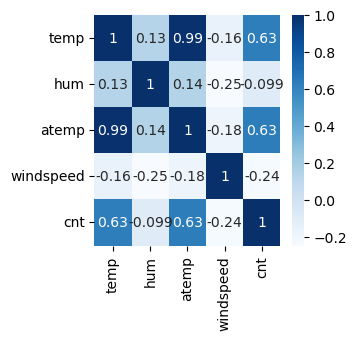

In [20]:
# Find the correlation between continuous random variables
plt.figure(figsize=(3,3))
sns.heatmap(df_orig[['temp','hum','atemp','windspeed','cnt']].corr(), annot=True, cmap = 'Blues')
plt.show()

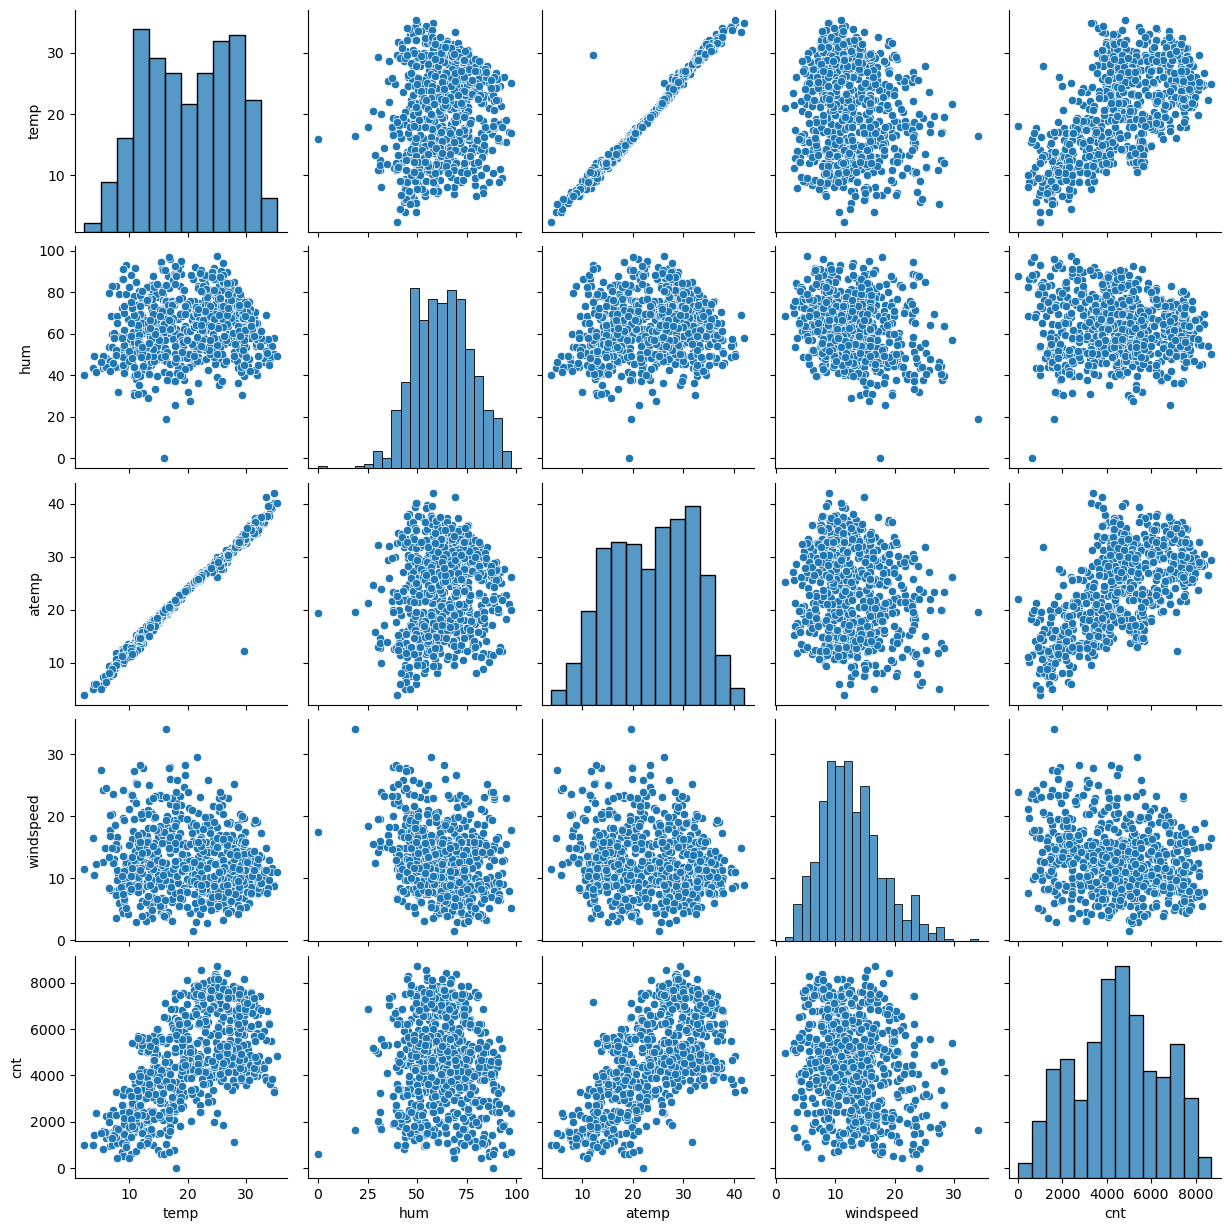

In [21]:
sns.pairplot(
                data=df_orig[['temp','hum','atemp','windspeed','cnt']],
                kind='scatter')

# It can be observed that temp and atemp are highly correlated and thus maintain a very linear relationship

### Step 1.6 Understand the relationship with categorical variables

#### Step 1.6.1 Understand the relationship with <b>month<b>
<b>Observation: Month introduces variation in the target variable with same pattern acroos years<b>

<Axes: xlabel='cnt', ylabel='mnth'>

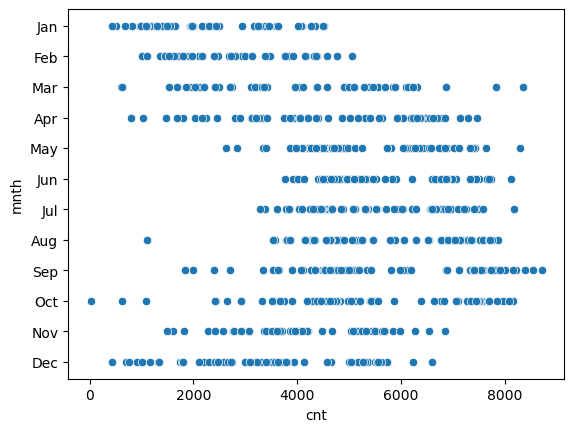

In [22]:
sns.scatterplot(
            data=df_orig,
            x='cnt',
            y='mnth'
            )

<Axes: xlabel='cnt', ylabel='mnth'>

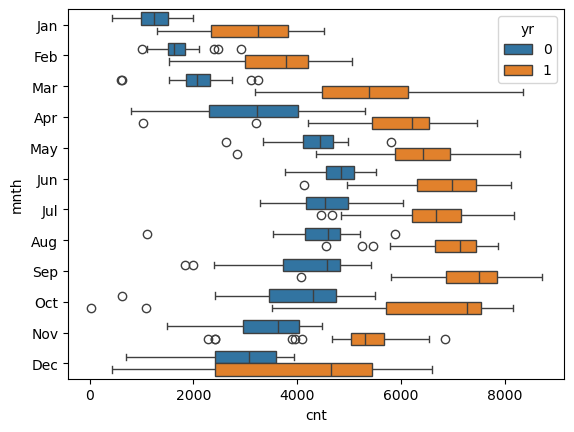

In [23]:
sns.boxplot(
            data=df_orig,
            x='cnt',
            y='mnth',
            hue='yr'
            )

#### Step 1.6.2 Understand the relationship with <b>season<b>
<b>Observation: Season influences target variable with similar patterns across years<b>

<Axes: xlabel='cnt', ylabel='season'>

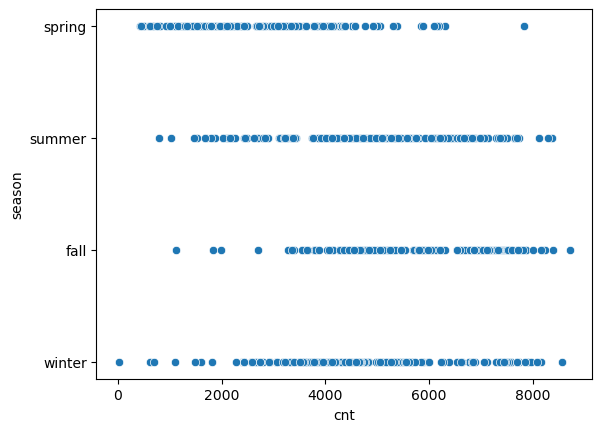

In [24]:
sns.scatterplot(
                    data=df_orig,
                    x='cnt',
                    y='season'
                )

<Axes: xlabel='cnt', ylabel='season'>

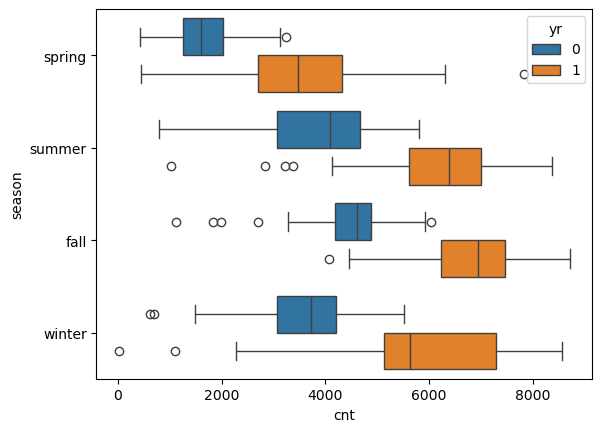

In [25]:
sns.boxplot(
            data=df_orig,
            x='cnt',
            y='season',
            hue='yr'
            )

#### Step 1.6.3 Understand the relationship with <b>weekday<b>
<b>Observation: Weekday doesn't seem to influence count <b>

<Axes: xlabel='cnt', ylabel='weekday'>

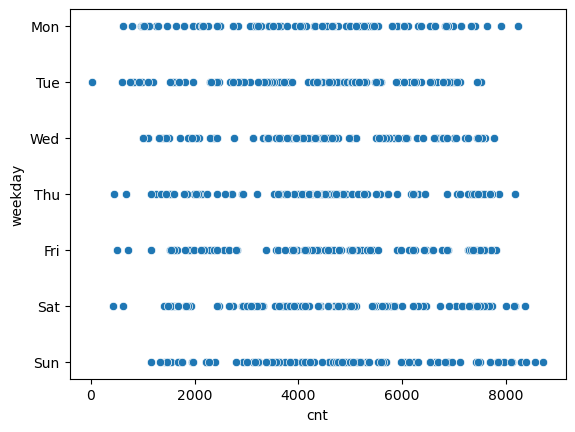

In [26]:
sns.scatterplot(
                    data=df_orig,
                    x='cnt',
                    y='weekday'
                )

<Axes: xlabel='cnt', ylabel='weekday'>

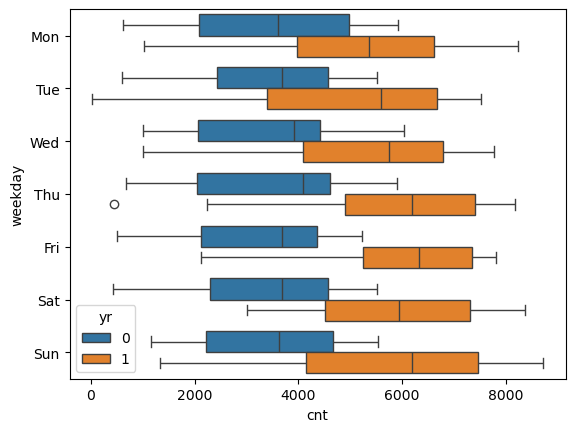

In [27]:
sns.boxplot(
            data=df_orig,
            x='cnt',
            y='weekday',
            hue = 'yr'
            )

#### Step 1.6.4 Understand the relationship with <b>holiday<b>
<b>Observation: As the number of holidays are less there is little chance to understand the influence of holiday on target variable<b>

<Axes: xlabel='cnt', ylabel='holiday'>

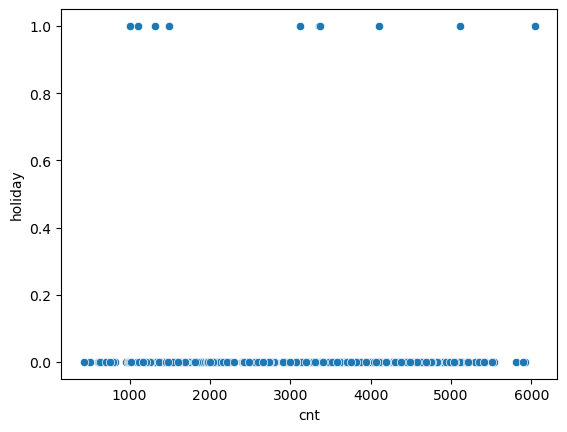

In [28]:
sns.scatterplot(
                data=df_orig[df_orig['yr']==0],
                x='cnt',
                y='holiday'
            )

<Axes: xlabel='cnt', ylabel='holiday'>

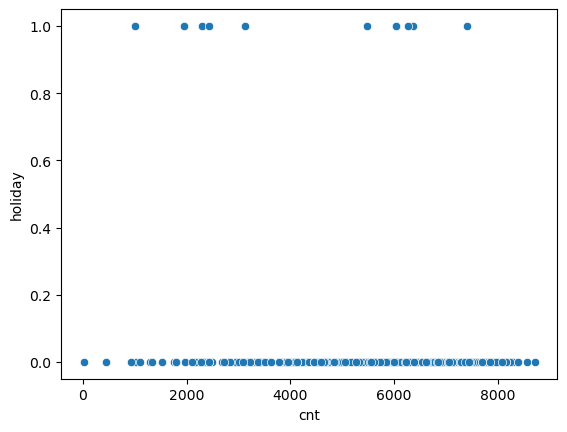

In [29]:
sns.scatterplot(
                data=df_orig[df_orig['yr']==1],
                x='cnt',
                y='holiday'
            )

<Axes: xlabel='holiday', ylabel='cnt'>

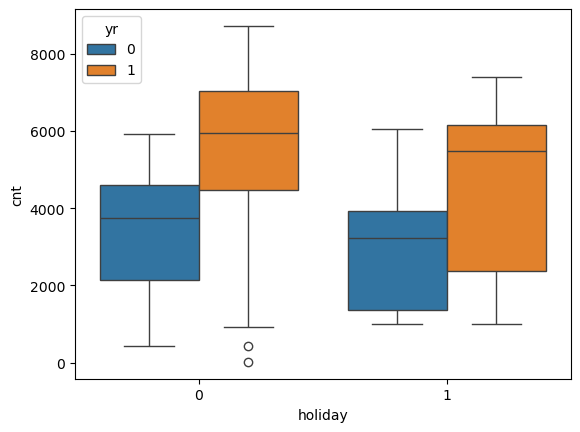

In [30]:
sns.boxplot(
            data=df_orig,
            x='holiday',
            y='cnt',
            hue = 'yr'
            )

#### Step 1.6.5 Understand the relationship with <b>workingday<b>
<b>Observation: Working Day doesn't seem to influence count <b>

<Axes: xlabel='cnt', ylabel='workingday'>

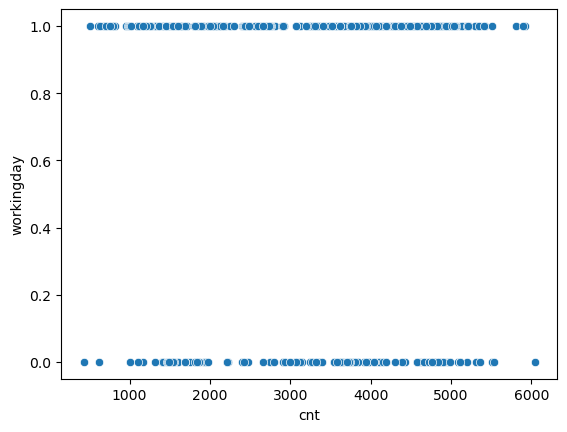

In [31]:
sns.scatterplot(
                data=df_orig[df_orig['yr']==0],
                x='cnt',
                y='workingday'
            )

<Axes: xlabel='cnt', ylabel='workingday'>

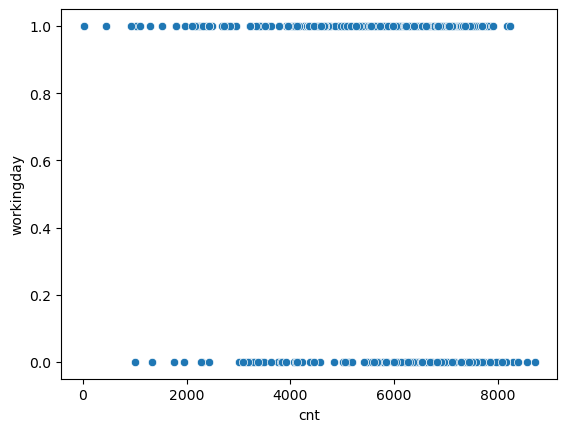

In [32]:
sns.scatterplot(
                data=df_orig[df_orig['yr']==1],
                x='cnt',
                y='workingday'
            )

<Axes: xlabel='workingday', ylabel='cnt'>

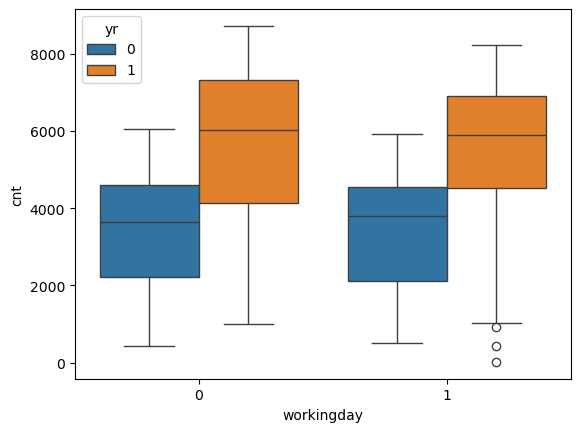

In [33]:
sns.boxplot(
            data=df_orig,
            x='workingday',
            y='cnt',
            hue='yr'
            )

#### Step 1.6.5 Understand the relationship with <b>weather situation<b>
<b>Observation: Weather situation appears to influence the target variable<b>

<Axes: xlabel='weathersit', ylabel='count'>

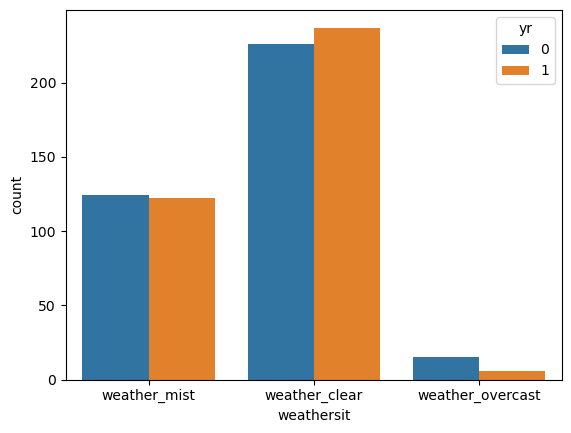

In [34]:
sns.countplot(
                data=df_orig,
                x='weathersit',
                hue='yr'
)

<Axes: xlabel='cnt', ylabel='weathersit'>

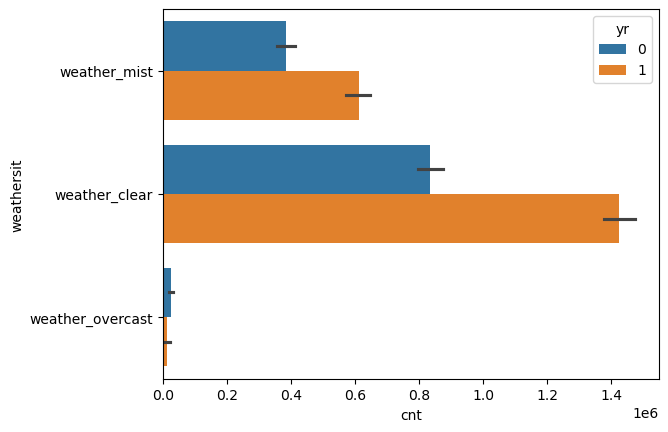

In [35]:
sns.barplot(
                data=df_orig,
                x='cnt',
                y='weathersit',
                hue='yr',
                estimator='sum'
)

<Axes: xlabel='cnt', ylabel='weathersit'>

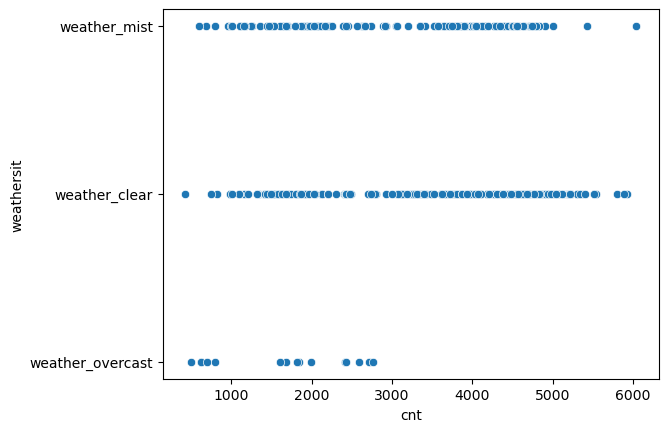

In [36]:
sns.scatterplot(
                data=df_orig[df_orig['yr']==0],
                x='cnt',
                y='weathersit'
            )

<Axes: xlabel='cnt', ylabel='weathersit'>

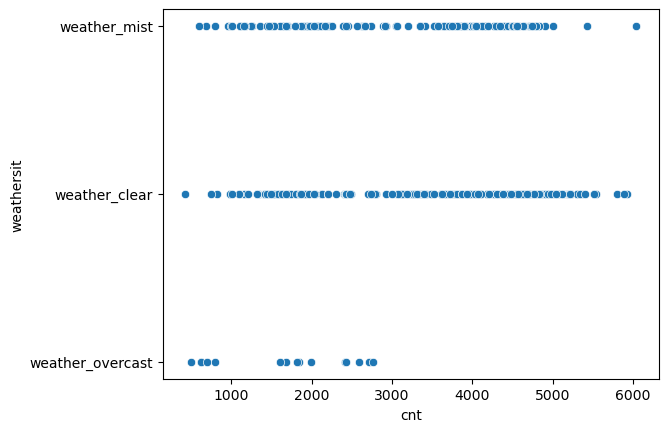

In [37]:
sns.scatterplot(
                data=df_orig[df_orig['yr']==0],
                x='cnt',
                y='weathersit'
            )

<Axes: xlabel='cnt', ylabel='weathersit'>

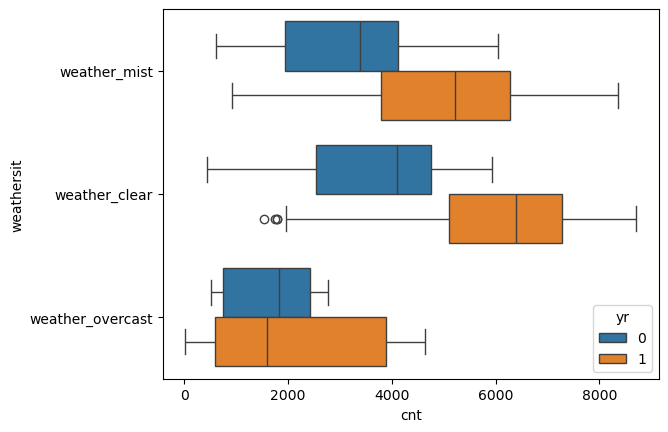

In [38]:
sns.boxplot(
            data=df_orig,
            x='cnt',
            y='weathersit',
            hue='yr'
            )

#### Step 1.6.6 Understand the relationship with <b>year<b>
<b>Observation: Year shows to linearly influence the target variable<b>

<Axes: xlabel='yr', ylabel='count'>

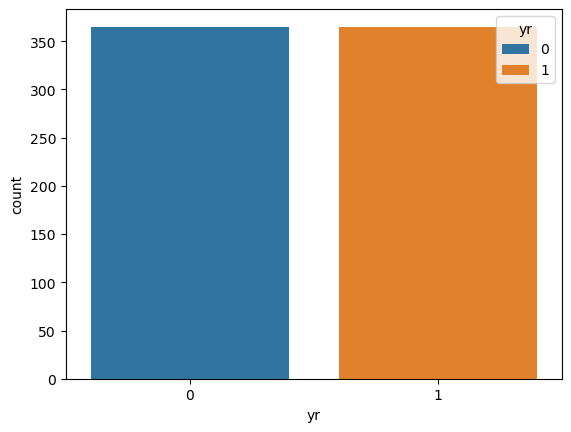

In [39]:
sns.countplot(
            data=df_orig,
            x='yr',
            hue='yr'
            )

<Axes: xlabel='yr', ylabel='cnt'>

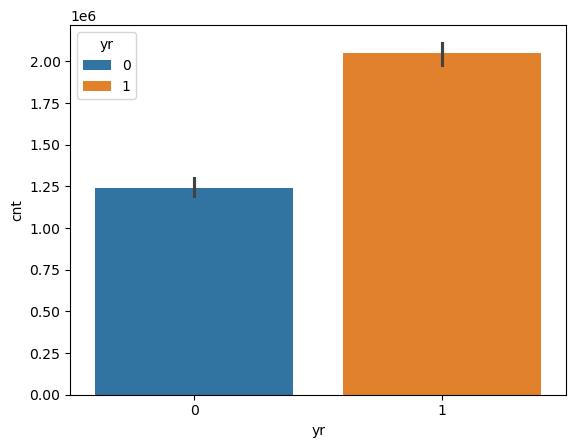

In [40]:
sns.barplot(
            data=df_orig,
            x='yr',
            y='cnt',
            estimator='sum',
            hue='yr'
            )

<Axes: xlabel='yr', ylabel='cnt'>

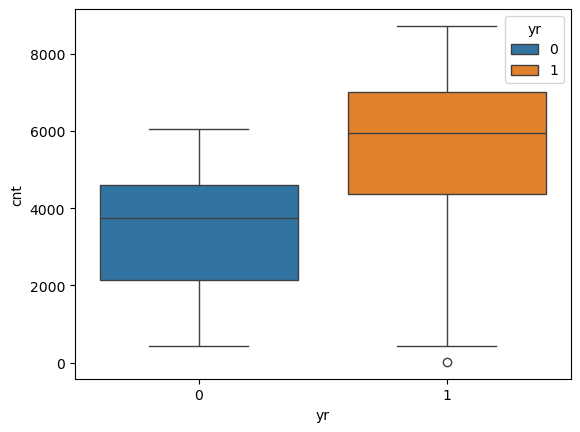

In [41]:
sns.boxplot(
            data=df_orig,
            x='yr',
            y='cnt',
            hue='yr'
            )

### Step 1.7 Standardize the categorical variables and generate dummy columns for the same

In [42]:
# Create a new dataframe for multi-linear regression
# Dropping column 'holiday' since it appears to be highly skewed
df_mlr=df_orig.iloc[:,:].drop(columns=['holiday'])

# Retain atemp
# temp and atemp are highly correlated
# atemp has higher correlation with cnt than temp
df_mlr.drop(columns=['temp'], axis =1, inplace=True)
df_mlr.head(5)

,season,yr,mnth,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,Jan,Mon,1,weather_mist,18.18125,80.5833,10.749882,985
1,spring,0,Jan,Tue,1,weather_mist,17.68695,69.6087,16.652113,801
2,spring,0,Jan,Wed,1,weather_clear,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,Thu,1,weather_clear,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,Fri,1,weather_clear,11.46350,43.6957,12.522300,1600


In [43]:
def func_get_dummies(df, in_column_name, drop_first=None):
    """
    This function is to generate dummy columns for a dataframe
    The function then returns the modified dataframe with the dummy columns 
    """
    temp_df = pd.get_dummies(df[in_column_name], drop_first=drop_first, dtype=int)
    final_df = pd.concat([df, temp_df],axis=1)
    final_df = final_df.drop(columns=[in_column_name])
    return final_df

In [44]:
# Generate dummy columns for season
df_mlr = func_get_dummies(df_mlr, 'season',False)
# Drop the dummy column 'spring' to simulate drop_first
df_mlr.drop(columns=['spring'], inplace=True) 
df_mlr.head(5)

,yr,mnth,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,fall,summer,winter
0,0,Jan,Mon,1,weather_mist,18.18125,80.5833,10.749882,985,0,0,0
1,0,Jan,Tue,1,weather_mist,17.68695,69.6087,16.652113,801,0,0,0
2,0,Jan,Wed,1,weather_clear,9.47025,43.7273,16.636703,1349,0,0,0
3,0,Jan,Thu,1,weather_clear,10.60610,59.0435,10.739832,1562,0,0,0
4,0,Jan,Fri,1,weather_clear,11.46350,43.6957,12.522300,1600,0,0,0


In [45]:
# Generate dummy for month
df_mlr = func_get_dummies(df_mlr, 'mnth', False)
# Manually drop month column 'Dec' to simulate drop_first
df_mlr.drop(columns='Dec', inplace=True)
df_mlr.head(5)

,yr,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,fall,summer,winter,Apr,Aug,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,Mon,1,weather_mist,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,Tue,1,weather_mist,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,Wed,1,weather_clear,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,Thu,1,weather_clear,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,Fri,1,weather_clear,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [46]:
#Generate dummy for weekday
df_mlr = func_get_dummies(df_mlr, 'weekday',False)
# Simulate drop_first by dropping 'Sat'
df_mlr.drop(columns='Sat',inplace=True)
df_mlr.head(5)

,yr,workingday,weathersit,atemp,hum,windspeed,cnt,fall,summer,winter,Apr,Aug,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Fri,Mon,Sun,Thu,Tue,Wed
0,0,1,weather_mist,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,1,weather_mist,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,1,weather_clear,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,1,weather_clear,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,weather_clear,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [47]:
#Generate dummy for weather situation
# There are only 3 unique values for weather situation hence we are not dropping the first column
df_mlr = func_get_dummies(df_mlr, 'weathersit',False)
# Simulate drop_first by dropping 'weather_overcast'
df_mlr.drop(columns=['weather_overcast'], inplace=True)
df_mlr.head(5)

,yr,workingday,atemp,hum,windspeed,cnt,fall,summer,winter,Apr,Aug,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Fri,Mon,Sun,Thu,Tue,Wed,weather_clear,weather_mist
0,0,1,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,1,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,1,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,0,1,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0,1,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [48]:
df_mlr.columns

Index(['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt', 'fall',
       'summer', 'winter', 'Apr', 'Aug', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar',
       'May', 'Nov', 'Oct', 'Sep', 'Fri', 'Mon', 'Sun', 'Thu', 'Tue', 'Wed',
       'weather_clear', 'weather_mist'],
      dtype='object')

# Step 3: Create the training set and test set

In [49]:
df_mlr_train, df_mlr_test = train_test_split(df_mlr, test_size=0.3, random_state=100)
print(df_mlr_train.shape, df_mlr_test.shape)

(511, 28) (219, 28)


# Step 4: Perform feature scaling using max-min scaler

In [50]:
def func_minmax_feature_scaling(df, column_list):
    scaler = MinMaxScaler()
    scaler.fit(df[column_list])
    return scaler

In [51]:
# Feature Scale the training and test dataset
scale_column_list = [
                        'yr', 'workingday', 'atemp', 'hum', 'windspeed',
                        'fall', 'summer', 'winter', 'Apr', 'Aug', 'Feb', 'Jan', 'Jul', 'Jun',
                        'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Fri', 'Mon', 'Sun', 'Thu', 'Tue',
                        'Wed', 'weather_clear', 'weather_mist'
                    ]
minmax_scaler = func_minmax_feature_scaling(df_mlr_train, scale_column_list)
df_mlr_train[scale_column_list] = minmax_scaler.transform(df_mlr_train[scale_column_list])
df_mlr_test[scale_column_list] = minmax_scaler.transform(df_mlr_test[scale_column_list])

In [52]:
df_mlr_train.describe()

,yr,workingday,atemp,hum,windspeed,cnt,fall,summer,winter,Apr,Aug,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Fri,Mon,Sun,Thu,Tue,Wed,weather_clear,weather_mist
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.712329,0.513133,0.650333,0.320844,4491.303327,0.262231,0.246575,0.248532,0.078278,0.095890,0.066536,0.088063,0.076321,0.076321,0.097847,0.084149,0.086106,0.086106,0.080235,0.146771,0.154599,0.136986,0.142857,0.152642,0.136986,0.626223,0.344423
std,0.500412,0.453121,0.212202,0.145741,0.169639,1953.413860,0.440279,0.431440,0.432585,0.268872,0.294729,0.249461,0.283664,0.265771,0.265771,0.297399,0.277883,0.280795,0.280795,0.271923,0.354224,0.361876,0.344170,0.350270,0.359994,0.344170,0.484280,0.475645
min,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.332910,0.538858,0.199179,3123.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.529300,0.653499,0.298098,4539.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,0.688457,0.754401,0.414438,6008.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
df_mlr_test.describe()

,yr,workingday,atemp,hum,windspeed,cnt,fall,summer,winter,Apr,Aug,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Fri,Mon,Sun,Thu,Tue,Wed,weather_clear,weather_mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.639269,0.532991,0.638508,0.313350,4546.981735,0.246575,0.264840,0.232877,0.091324,0.059361,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.132420,0.118721,0.155251,0.141553,0.123288,0.155251,0.652968,0.319635
std,0.500722,0.481313,0.217888,0.148974,0.159947,1898.633630,0.432005,0.442259,0.423633,0.288730,0.236840,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.339723,0.324202,0.362974,0.349389,0.329520,0.362974,0.477117,0.467403
min,0.000000,0.000000,0.025950,0.261915,-0.042808,441.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.344751,0.527265,0.198517,3303.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.549198,0.627737,0.299459,4579.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,0.714132,0.743928,0.403048,5869.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,0.980934,1.002146,0.807474,8395.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
# Create the X and Y variables for training and test datasets
y_mlr_train = df_mlr_train.pop('cnt')
X_mlr_train = df_mlr_train
y_mlr_test = df_mlr_test.pop('cnt')
X_mlr_test = df_mlr_test

# Step 5: Build the model using VIF & RFE
We will assume there are top 10 features

### Step 5.1 Identify the top 10 features using RFE

In [55]:
lm = LinearRegression()
lm.fit(X_mlr_train, y_mlr_train)
rfe = RFE(estimator=lm, n_features_to_select=10)
rfe = rfe.fit(X_mlr_train, y_mlr_train)
df_rfe = pd.DataFrame(
                        data=sorted(list(zip(X_mlr_train.columns, rfe.support_, rfe.ranking_)), key=lambda x:x[2]),
                        columns=['feature_name','Significant','Rank']
                    )
df_rfe

,feature_name,Significant,Rank
0,yr,True,1
1,atemp,True,1
2,hum,True,1
3,windspeed,True,1
4,winter,True,1
5,Mon,True,1
6,Tue,True,1
7,Wed,True,1
8,weather_clear,True,1
9,weather_mist,True,1


In [56]:
rfe_cols = X_mlr_train.columns[rfe.support_]

### Step 5.3 Define model helper functions

In [57]:
def func_get_linear_model(in_X,in_y):
    """
    This function will returns the linear regression using stats model
    """
    # Add the constant
    X = in_X
    y = in_y
    lr = sm.OLS(y, X).fit()
    return lr

def func_get_vif(in_X):
    """
    This function is used to get the VIF for the features
    """
    vif = pd.DataFrame()
    X = in_X
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF', ascending = False)
    return vif

def func_residual_analysis(lr_model, X, y):
    """
    This function helps to plot the residual analysis
    """
    y_pred = lr_model.predict(X)
    y_res = y-y_pred
    sns.displot(y_res, kde=True)  

### Step 5.4: Build the initial model & identify the p-statistics and VIF for RFE columns

In [58]:
# Verify the model
lr = func_get_linear_model(sm.add_constant(X_mlr_train[rfe_cols]), y_mlr_train)
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     199.4
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          2.25e-167
Time:                        17:38:26   Log-Likelihood:                -4186.0
No. Observations:                 511   AIC:                             8394.
Df Residuals:                     500   BIC:                             8441.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -85.8371    419.516     -0.205

In [59]:
# Get the variance inflation factor for the identified features
vif = func_get_vif(X_mlr_train[rfe_cols])
vif

,Features,VIF
2,hum,18.01
8,weather_clear,9.85
1,atemp,8.36
9,weather_mist,7.35
3,windspeed,4.10
0,yr,2.07
4,winter,1.50
6,Tue,1.29
5,Mon,1.28
7,Wed,1.26


### Step 5.5 Rebuild model by dropping wed

In [60]:
# Dropping weekday column Wednesday due to high p-value
rfe_cols = rfe_cols.drop('Wed')

In [61]:
# Verify the model
lr = func_get_linear_model(sm.add_constant(X_mlr_train[rfe_cols]), y_mlr_train)
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     221.1
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          3.41e-168
Time:                        17:38:26   Log-Likelihood:                -4186.8
No. Observations:                 511   AIC:                             8394.
Df Residuals:                     501   BIC:                             8436.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -110.5649    419.378     -0.264

In [62]:
# Get the variance inflation factor for the identified features
vif = func_get_vif(X_mlr_train[rfe_cols])
vif

,Features,VIF
2,hum,17.85
7,weather_clear,9.76
1,atemp,8.34
8,weather_mist,7.33
3,windspeed,4.09
0,yr,2.07
4,winter,1.50
5,Mon,1.23
6,Tue,1.23


### Step 5.6 Rebuild model by dropping Monday

In [63]:
# Dropping weekday column "Monday" since the p-value is very high
rfe_cols = rfe_cols.drop('Mon')

In [64]:
# Verify the model
lr = func_get_linear_model(sm.add_constant(X_mlr_train[rfe_cols]), y_mlr_train)
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     246.4
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          2.00e-168
Time:                        17:38:26   Log-Likelihood:                -4189.1
No. Observations:                 511   AIC:                             8396.
Df Residuals:                     502   BIC:                             8434.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -153.9570    420.357     -0.366

In [65]:
# Get the variance inflation factor for the identified features
vif = func_get_vif(X_mlr_train[rfe_cols])
vif

,Features,VIF
2,hum,17.79
6,weather_clear,9.72
1,atemp,8.33
7,weather_mist,7.32
3,windspeed,4.07
0,yr,2.07
4,winter,1.49
5,Tue,1.19


### Step 5.7 Rebuild model by dropping Tuesday

In [66]:
# Dropping weekday column "Tuesday" since p-value is high 
rfe_cols = rfe_cols.drop('Tue')

In [67]:
# Verify the model
lr = func_get_linear_model(sm.add_constant(X_mlr_train[rfe_cols]), y_mlr_train)
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     278.8
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          1.27e-168
Time:                        17:38:26   Log-Likelihood:                -4191.6
No. Observations:                 511   AIC:                             8399.
Df Residuals:                     503   BIC:                             8433.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -97.5302    421.171     -0.232

In [68]:
# Get the variance inflation factor for the identified features
vif = func_get_vif(X_mlr_train[rfe_cols])
vif

,Features,VIF
2,hum,17.76
5,weather_clear,9.70
1,atemp,8.33
6,weather_mist,7.32
3,windspeed,4.07
0,yr,2.06
4,winter,1.49


### Step 5.7 Rebuild model by dropping humidity

In [69]:
# Dropping column hum (humidity) due to very high VIF
rfe_cols = rfe_cols.drop('hum')

In [70]:
# Verify the model
lr = func_get_linear_model(sm.add_constant(X_mlr_train[rfe_cols]), y_mlr_train)
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     315.5
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          4.22e-167
Time:                        17:38:26   Log-Likelihood:                -4198.1
No. Observations:                 511   AIC:                             8410.
Df Residuals:                     504   BIC:                             8440.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1216.8985    288.528     -4.218

In [71]:
# Get the variance inflation factor for the identified features
vif = func_get_vif(X_mlr_train[rfe_cols])
vif

,Features,VIF
4,weather_clear,7.35
1,atemp,6.31
5,weather_mist,4.17
2,windspeed,3.98
0,yr,2.06
3,winter,1.31


### Step 5.8 Rebuild model by dropping weather_clear

In [72]:
# Dropping column hum (humidity) due to very high VIF
rfe_cols = rfe_cols.drop('weather_clear')

In [73]:
# Verify the model
lr = func_get_linear_model(sm.add_constant(X_mlr_train[rfe_cols]), y_mlr_train)
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     305.3
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          4.64e-150
Time:                        17:38:27   Log-Likelihood:                -4241.0
No. Observations:                 511   AIC:                             8494.
Df Residuals:                     505   BIC:                             8519.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1064.2789    177.455      5.997   

In [74]:
# Get the variance inflation factor for the identified features
vif = func_get_vif(X_mlr_train[rfe_cols])
vif

,Features,VIF
1,atemp,3.16
2,windspeed,2.80
0,yr,2.00
4,weather_mist,1.44
3,winter,1.24


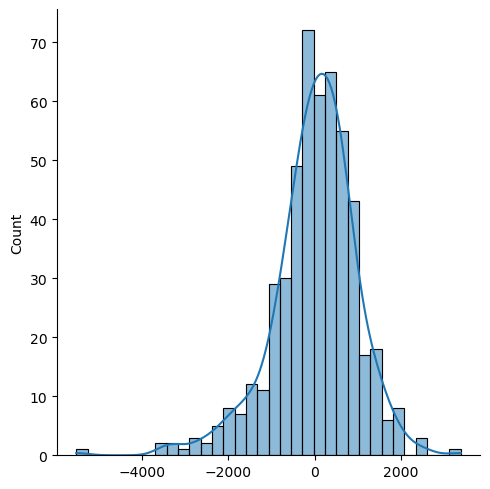

In [75]:
# Perform residual analysis on training dataset
func_residual_analysis(lr, sm.add_constant(X_mlr_train[rfe_cols]), y_mlr_train)

# Step 6: Evaluate the model on test dataset

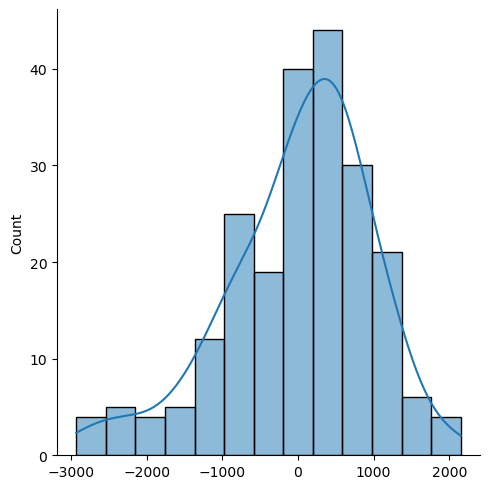

In [76]:
# Perform residual analysis on test dataset
func_residual_analysis(lr, sm.add_constant(X_mlr_test[rfe_cols]), y_mlr_test)

<Axes: >

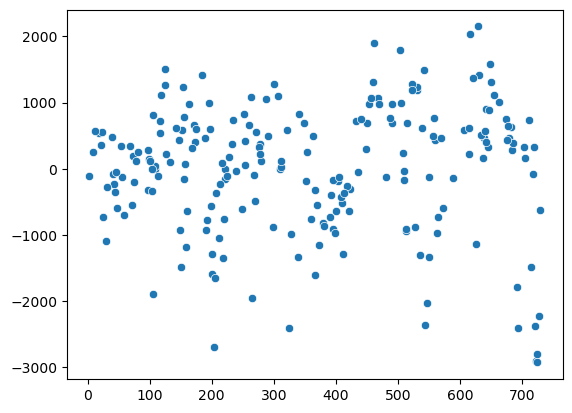

In [77]:
# Scatter plot for residuals
sns.scatterplot(y_mlr_test-lr.predict(sm.add_constant(X_mlr_test[rfe_cols])))

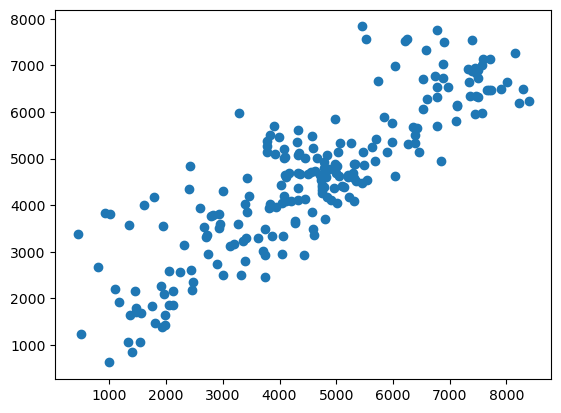

In [78]:
# Scatter plot for y_test and y_test_predicted
plt.scatter(y_mlr_test, lr.predict(sm.add_constant(X_mlr_test[rfe_cols])))

In [79]:
lr.params

const           1064.278872
yr              2080.256109
atemp           5425.253564
windspeed      -1320.667963
winter           724.992471
weather_mist    -498.674668
dtype: float64

### For the model it is understood that the factors that influence the demand for bike sharing users is:
#### Year
#### Atemp -> There is higher demand when the feels like temperture is higher
#### Winter -> There is higher demand in winter
#### Windspeed -> The demand seems to drop when then condition is windy
#### Weather Condition -> The demand seems to drop when it is misty.

In [80]:
from sklearn.metrics import r2_score
r2_score(y_mlr_test, lr.predict(sm.add_constant(X_mlr_test[rfe_cols])))

0.7406870654389265